<a href="https://colab.research.google.com/github/ShriMLEngineer/furniture_classification/blob/main/model_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/ShriMLEngineer/furniture_classification

Cloning into 'furniture_classification'...
remote: Enumerating objects: 352, done.
remote: Counting objects: 100% (41/41), done.
remote: Compressing objects: 100% (41/41), done.
remote: Total 352 (delta 0), reused 0 (delta 0), pack-reused 311
Receiving objects: 100% (352/352), 103.24 MiB | 17.15 MiB/s, done.
Resolving deltas: 100% (3/3), done.
Updating files: 100% (324/324), done.


In [2]:
cd /content/furniture_classification/detr-main

/content/furniture_classification/detr-main


In [3]:
import torch
checkpoint = torch.hub.load_state_dict_from_url(
            url="https://dl.fbaipublicfiles.com/detr/detr-r50-e632da11.pth", map_location="cpu", check_hash=True
        )
del checkpoint["model"]["class_embed.weight"]
del checkpoint["model"]["class_embed.bias"]
torch.save(checkpoint,"detr_r50_no-class-head.pth")




Downloading: "https://dl.fbaipublicfiles.com/detr/detr-r50-e632da11.pth" to /root/.cache/torch/hub/checkpoints/detr-r50-e632da11.pth


  0%|          | 0.00/159M [00:00<?, ?B/s]

In [5]:
!python main.py \
  --coco_path "/content/furniture_classification/Dataset" \
  --output_dir "/content/furniture_classification/outputs" \
  --resume "/content/furniture_classification/detr-main/detr_r50_no-class-head.pth" \
  --num_classes=4 \
  --epochs=100 \
  --lr=1e-4 \
  --batch_size=1 \
  --num_workers=1

Not using distributed mode
git:
  sha: 50c8b18225b19df5574e6e2257074f2ed5bb25a1, status: has uncommited changes, branch: main

Namespace(aux_loss=True, backbone='resnet50', batch_size=1, bbox_loss_coef=5, clip_max_norm=0.1, coco_panoptic_path=None, coco_path='/content/furniture_classification/Dataset', dataset_file='coco', dec_layers=6, device='cuda', dice_loss_coef=1, dilation=False, dim_feedforward=2048, dist_url='env://', distributed=False, dropout=0.1, enc_layers=6, eos_coef=0.1, epochs=100, eval=False, frozen_weights=None, giou_loss_coef=2, hidden_dim=256, lr=0.0001, lr_backbone=1e-05, lr_drop=200, mask_loss_coef=1, masks=False, nheads=8, num_classes=4, num_queries=100, num_workers=1, output_dir='/content/furniture_classification/outputs', position_embedding='sine', pre_norm=False, remove_difficult=False, resume='/content/furniture_classification/detr-main/detr_r50_no-class-head.pth', seed=42, set_cost_bbox=5, set_cost_class=1, set_cost_giou=2, start_epoch=0, weight_decay=0.0001, 

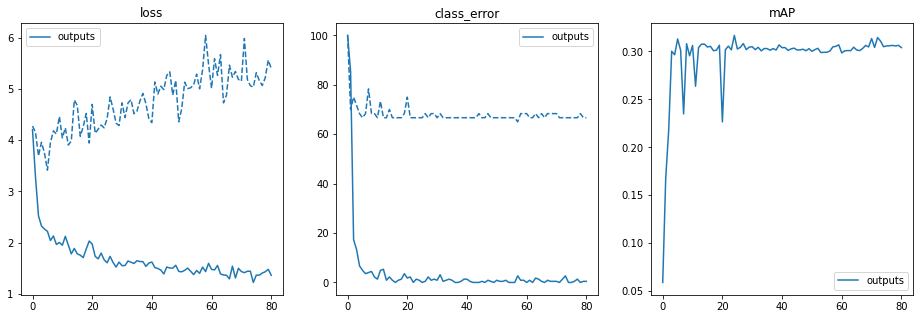

In [6]:
from util.plot_utils import plot_logs

from pathlib import Path

log_directory = [Path('/content/furniture_classification/outputs')]

fields_of_interest = (
    'loss','class_error','mAP'
  )

plot_logs(log_directory, fields_of_interest)